In [1]:
import sys
import os
import pandas as pd
import numpy as np
import uproot3 as uproot
import matplotlib.pyplot as plt
import flavio

sys.path.append('/home/oscar/Documents/Thesis/Code/scripts')

import plot_tools
import math

working_directory = os.getcwd().split('/')[:-1]
sys.path.append('/'+os.path.join(*working_directory))
import common_tools

In [2]:
output_dir = os.path.join('Branching_fractions')
os.makedirs(output_dir, exist_ok=True)

In [3]:
def stat_uncertainty(alpha, epsilon, a_error, e_error, db_dq2):
    '''
    This is the function to calculate the relative error for the 
    db/dq2 branching ratio. 
    
    Parameters:
    alpha: float 
        The numerator (yields or efficiency). Be careful with 
        the order.
    epsilon: float
        Represents the value of the denominator
    a_error: float
        Uncertainty of the alpha parameter
    e_error: float
        Uncertainty of the epsilon parameter
    '''
    
    ratio = alpha/epsilon
    in_root = (a_error/alpha)**2 + (e_error/epsilon)**2
    ratio_u = ratio*np.sqrt(in_root)
    
    stat_u = db_dq2*(ratio_u/ratio)
    
    return stat_u

In [4]:
def order_data(x, dx, order):
    
    print('Branching fraction per bin of $\\q^2$.')
    print('----------------------')
    for k in range(len(x)):
        x1 = np.round(x[k], 4)
        x2 = np.round(dx[k], 4)
        
        print('Bin '+str(k+1)+': ('+str(x1)+' +/- '+str(x2)+')e-'+str(order))

In [5]:
def quad_uncertainty(x,y):
    return np.sqrt(x**2 + y**2)

In [6]:

YieldP = 7962 
YieldP_u = 123
EffP = 0.0076061384181822945
EffP_u = 3.76650731e-05

#F1 = Yield/Gen_Eff

#Jpsi channel

#YieldJ = 2376689
YieldJ = 1906375
YieldJ_u = 1762
EffJ = 0.00483249
EffJ_u = 1.01125e-05

N = YieldP/YieldJ
E = EffJ/EffP

BRJpsimumu = 0.05961
Deltaq2 = 22 - 1.1

BR = N*E*BRJpsimumu
BR

0.0001581756764632162

In [7]:
stat_yie = stat_uncertainty(YieldP, YieldJ, YieldP_u, YieldJ_u, BR)
stat_eff = stat_uncertainty(EffJ, EffP, EffJ_u, EffP_u, BR)

print(stat_yie)
print(stat_eff)

2.4479274462752257e-06
8.503413623277558e-07


In [8]:
PDG_BR = 0.000444
PDG_BR - BR

0.0002858243235367838

$$
B^+ \rightarrow \mu^+ \mu^- K⁺
$$

In [9]:
PDG_BR_Res = 1.020e-3

BR_tot = BR*PDG_BR_Res
BR_tot

1.6133918999248053e-07

In [10]:
stat_yie = stat_uncertainty(YieldP, YieldJ, YieldP_u, YieldJ_u, BR_tot)
stat_eff = stat_uncertainty(EffJ, EffP, EffJ_u, EffP_u, BR_tot)

print(stat_yie)
print(stat_eff)


2.4968859952007304e-09
8.673481895743109e-10


In [11]:
print(quad_uncertainty(stat_yie, stat_eff))

2.643242810448442e-09


In [12]:
PDG_BR_Tot = 4.53e-7

PDG_BR_Tot - BR_tot

2.9166081000751946e-07

$$
\frac{dBF(B⁺ \rightarrow K⁺ \mu⁺ \mu^-)}{dq² (B⁺ \rightarrow J/\Psi K⁺)} = \frac{Y^{NonRes}_{Bin \#} \times \epsilon^{J/\Psi} \times BF(J/\Psi \rightarrow \mu^+ \mu^-) \times BF(B⁺ \rightarrow K⁺J/\Psi)}{Y^{J/\Psi}_{s} \times \epsilon^{NonRes}_{Bin \#} \times (q²_{max}-q²_{min})}
$$

In [13]:
Yields_NR   =  [491, 1092, 1161, 609, 579, 993, 1116, 941, 593] 
Yields_NR_u =  [36,    51,   51,  34,  38,   42,   50,   45,  35]
q2_bins = [[1.1, 2.0], [2.0,4.0], [4.0,6.0], [6.0,7.0], [7.0, 8.0], [11.0,12.5], [15.0,17.0], [17.0,19.0], [19.0, 23.0]]

effs = [0.00361293, 0.00426355, 0.00440781, 0.00464022, 0.00472988, 0.00527273, 0.00646835, 0.00685849, 0.0071482]
effs_u = [4.51497876e-05, 3.54649449e-05, 3.65850480e-05, 5.26733736e-05, 5.31715149e-05, 4.70493527e-05, 4.85352535e-05, 5.30135558e-05, 5.43441474e-05]

def differential_BR_normalized(Yield, YieldR, Eff, EffR, q2max, q2min):
    
    BRJpsimumu = 0.05961
    Dq2 = q2max - q2min
    Ns = Yield/YieldR
    Es = EffR/Eff
    
    BR = (Ns*Es*BRJpsimumu)/Dq2
    
    return BR

def differential_BR(BR):
    
    PDG_BR_Res = 1.020e-3 
    BR_tot = BR*PDG_BR_Res
    
    return BR_tot

In [14]:
Normalized_diff_BRs = []
Total_diff_BRs = []
NdBRs_stat1 = []
NdBRs_stat2 = []
NdBRs_stat = []
DBRs_stat1 = []
DBRs_stat2 = []
DBRs_stat = []


for i in range(len(q2_bins)):
    
    #Normalized branching fractions with uncertainties' calculations
    z = differential_BR_normalized(Yields_NR[i], YieldJ, effs[i], EffJ, q2_bins[i][1], q2_bins[i][0])
    Normalized_diff_BRs.append(z)
    w1 = stat_uncertainty(Yields_NR[i], YieldJ, Yields_NR_u[i], YieldJ_u, z)
    w2 = stat_uncertainty(EffJ, effs[i], EffJ_u, effs_u[i], z)
    NdBRs_stat1.append(w1)
    NdBRs_stat2.append(w2)
    w3 = quad_uncertainty(w1, w2)
    NdBRs_stat.append(w3)
    
    #Total branching fractions with uncertainties' calculations
    y = differential_BR(z)
    Total_diff_BRs.append(y)
    t1 = stat_uncertainty(Yields_NR[i], YieldJ, Yields_NR_u[i], YieldJ_u, y)
    t2 = stat_uncertainty(EffJ, effs[i], EffJ_u, effs_u[i], y)
    DBRs_stat1.append(t1)
    DBRs_stat2.append(t2)
    t3 = quad_uncertainty(t1, t2)
    DBRs_stat.append(t3)
    
    
print(Normalized_diff_BRs)
print(Total_diff_BRs)
print(NdBRs_stat1)
print(DBRs_stat1)
print(NdBRs_stat2)
print(DBRs_stat2)
print('--------------------')
print(NdBRs_stat)
print(DBRs_stat)

[2.2817138951926746e-05, 1.9350983115565592e-05, 1.9900368112918917e-05, 1.9831724140804344e-05, 1.8497378908060197e-05, 1.8971610868611536e-05, 1.3035342280421533e-05, 1.0366039747454353e-05, 3.133861208289611e-06]
[2.3273481730965284e-08, 1.9738002777876904e-08, 2.0298375475177296e-08, 2.0228358623620433e-08, 1.8867326486221404e-08, 1.9351043085983767e-08, 1.3296049126029966e-08, 1.0573360542403441e-08, 3.1965384324554034e-09]
[1.6730799707727207e-06, 9.039316671749149e-07, 8.743698589068505e-07, 1.107341570506712e-06, 1.2141107040292925e-06, 8.026161944614442e-07, 5.841449726972737e-07, 4.958118022241674e-07, 1.849891911461318e-07]
[1.7065415701881755e-09, 9.220103005184132e-10, 8.918572560849875e-10, 1.1294884019168464e-09, 1.2383929181098785e-09, 8.18668518350673e-10, 5.958278721512193e-10, 5.057280382686507e-10, 1.8868897496905448e-10]
[2.8910954052216135e-07, 1.6598022811318013e-07, 1.7034279120472333e-07, 2.2891269138505114e-07, 2.1151251587365078e-07, 1.7387932184441177e-07, 1

In [15]:
def mid_value(x1, x2):
    mid = (x1+x2)/2
    
    return mid

def length_per_q2(x1, x2):
    
    length = (x2-x1)/2
    
    return length

xbars = []
mids = []

for j in range(len(q2_bins)):
    
    w = mid_value(q2_bins[j][0], q2_bins[j][1])
    xerr = length_per_q2(q2_bins[j][0], q2_bins[j][1])
    print('The mid point is: ', w)
    mids.append(w)
    xbars.append(xerr)

The mid point is:  1.55
The mid point is:  3.0
The mid point is:  5.0
The mid point is:  6.5
The mid point is:  7.5
The mid point is:  11.75
The mid point is:  16.0
The mid point is:  18.0
The mid point is:  21.0


In [16]:
rescaled_BRs_normal = []

for i in Normalized_diff_BRs:
    rescaled_BRs_normal.append(i * 1e5)
    
rescaled_BRs_normal

[2.2817138951926745,
 1.9350983115565592,
 1.9900368112918916,
 1.9831724140804343,
 1.8497378908060198,
 1.8971610868611535,
 1.3035342280421534,
 1.0366039747454354,
 0.31338612082896106]

In [17]:
def rescale_order(BR, order):
    
    rescaled_list = []
    
    if order == 5:
        fscale = 1e5
    else:
        fscale = 1e8
        
    for i in BR:
        rescaled_list.append(i * fscale)
        
    return rescaled_list

In [18]:
rescaled_BRs_normal = rescale_order(Normalized_diff_BRs, 5)
rescaled_BRs_normal

[2.2817138951926745,
 1.9350983115565592,
 1.9900368112918916,
 1.9831724140804343,
 1.8497378908060198,
 1.8971610868611535,
 1.3035342280421534,
 1.0366039747454354,
 0.31338612082896106]

In [19]:
rescaled_BRs_normal_u = rescale_order(NdBRs_stat, 5)
rescaled_BRs_normal_u

[0.1697875412102367,
 0.09190440114848279,
 0.08908082378829922,
 0.11307547806882885,
 0.12323969920483033,
 0.08212349080359671,
 0.05929050149897547,
 0.05027126412770991,
 0.018663238114020778]

In [20]:
Stat = rescale_order(NdBRs_stat1, 5)
Sys = rescale_order(NdBRs_stat2, 5)

def present_all(BR, Stat, Sys, order):
    
    if order == 5:
        fscale = 'e-5'
    else:
        fscale = 'e-8'
        
    print('Branching fraction per bin of $\\q^2$.')
    print('----------------------')
    
    for k in range(len(BR)):
        x = np.round(BR[k], 4)
        dx1 = np.round(Stat[k], 4)
        dx2 = np.round(Sys[k], 4)

        print('Bin '+str(k+1)+': ['+str(x)+' +/- '+str(dx1)+' (stat) +/-'+str(dx2)+' (sys)]'+str(fscale))

present_all(rescaled_BRs_normal, Stat, Sys, 5)

Branching fraction per bin of $\q^2$.
----------------------
Bin 1: [2.2817 +/- 0.1673 (stat) +/-0.0289 (sys)]e-5
Bin 2: [1.9351 +/- 0.0904 (stat) +/-0.0166 (sys)]e-5
Bin 3: [1.99 +/- 0.0874 (stat) +/-0.017 (sys)]e-5
Bin 4: [1.9832 +/- 0.1107 (stat) +/-0.0229 (sys)]e-5
Bin 5: [1.8497 +/- 0.1214 (stat) +/-0.0212 (sys)]e-5
Bin 6: [1.8972 +/- 0.0803 (stat) +/-0.0174 (sys)]e-5
Bin 7: [1.3035 +/- 0.0584 (stat) +/-0.0102 (sys)]e-5
Bin 8: [1.0366 +/- 0.0496 (stat) +/-0.0083 (sys)]e-5
Bin 9: [0.3134 +/- 0.0185 (stat) +/-0.0025 (sys)]e-5


In [21]:
order_data(rescaled_BRs_normal, rescaled_BRs_normal_u, 5)

Branching fraction per bin of $\q^2$.
----------------------
Bin 1: (2.2817 +/- 0.1698)e-5
Bin 2: (1.9351 +/- 0.0919)e-5
Bin 3: (1.99 +/- 0.0891)e-5
Bin 4: (1.9832 +/- 0.1131)e-5
Bin 5: (1.8497 +/- 0.1232)e-5
Bin 6: (1.8972 +/- 0.0821)e-5
Bin 7: (1.3035 +/- 0.0593)e-5
Bin 8: (1.0366 +/- 0.0503)e-5
Bin 9: (0.3134 +/- 0.0187)e-5


In [22]:
rescaled_BRs = rescale_order(Total_diff_BRs, 8)
rescaled_BRs_u = rescale_order(DBRs_stat, 8)

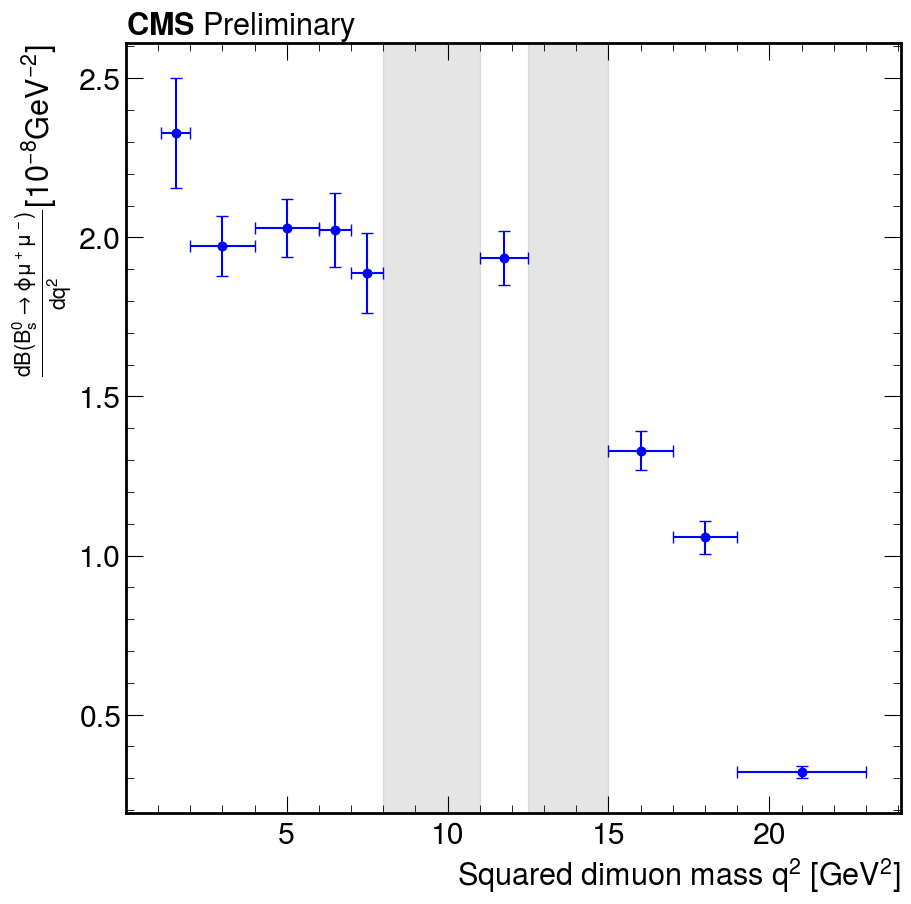

In [23]:
plt.scatter(mids, rescaled_BRs)
plt.errorbar(mids, rescaled_BRs, xerr=xbars, yerr=rescaled_BRs_u, fmt='bo', capsize=4)

#Mass vetos 
y_max = np.max([np.array(rescaled_BRs)+np.array(rescaled_BRs_u)]) 
y_min = np.min([np.array(rescaled_BRs)-np.array(rescaled_BRs_u)])
distance = y_max - y_min
y_max+= distance*0.05
y_min-= 0.05*distance
plt.ylim(y_min, y_max)
plt.fill_betweenx([y_min, y_max], 
            [q2_bins[4][1], q2_bins[4][1]], 
            [q2_bins[5][0], q2_bins[5][0]], color='grey', alpha=0.2)

plt.fill_betweenx([y_min, y_max], 
            [q2_bins[5][1], q2_bins[5][1]], 
            [q2_bins[6][0], q2_bins[6][0]], color='grey', alpha=0.2)

plt.title('$\\bf{CMS}$ Preliminary', loc='left', fontsize=22)
#plt.title('Preliminary', loc='center', fontsize=22, fontstyle='italic')
plt.xlabel('Squared dimuon mass $q^2$ [GeV$^2$]', fontsize=22)
plt.ylabel('$\\frac{ d\\mathrm{B}(B^0_s \\rightarrow\\phi\\mu^+\\mu^-)}{dq^2} [10^{-8} GeV^{-2}]$', fontsize=22)
plt.savefig(os.path.join(output_dir, 'Total_diff_BR.pdf'), bbox_inches='tight')
plt.savefig(os.path.join(output_dir, 'Total_diff_BR.png'), bbox_inches='tight')
plt.show()
plt.close()

In [24]:
"""q2_bins_pred = [[1.1, 2.0], [2.0,4.0], [4.0,6.0], [6.0,7.0], [7.0, 8.0], [11.0,12.5], [15.0,17.0], [17.0,19.0], [19.0, 22.0]]
preds_q2 = []
for x in q2_bins_pred:
    i = x[0]
    y = x[1]
    print(x, y)
    preds_q2.append(flavio.sm_prediction('<dBR/dq2>(B+->Kmumu)', q2min=i, q2max=y))

preds_q2"""

"q2_bins_pred = [[1.1, 2.0], [2.0,4.0], [4.0,6.0], [6.0,7.0], [7.0, 8.0], [11.0,12.5], [15.0,17.0], [17.0,19.0], [19.0, 22.0]]\npreds_q2 = []\nfor x in q2_bins_pred:\n    i = x[0]\n    y = x[1]\n    print(x, y)\n    preds_q2.append(flavio.sm_prediction('<dBR/dq2>(B+->Kmumu)', q2min=i, q2max=y))\n\npreds_q2"

In [25]:
"""preds_q2_err = []
for x in q2_bins_pred:
    i = x[0]
    y = x[1]
    print(x, y)
    preds_q2_err.append(flavio.sm_uncertainty('<dBR/dq2>(B+->Kmumu)', q2min=i, q2max=y))

preds_q2_err"""

"preds_q2_err = []\nfor x in q2_bins_pred:\n    i = x[0]\n    y = x[1]\n    print(x, y)\n    preds_q2_err.append(flavio.sm_uncertainty('<dBR/dq2>(B+->Kmumu)', q2min=i, q2max=y))\n\npreds_q2_err"

In [26]:
#preds_q2_err

In [27]:
Flavio_pred = [3.525579668387929e-08,
 3.500188450239847e-08,
 3.4559186567542394e-08,
 3.412458842340377e-08,
 3.377742509751307e-08,
 3.1545149610720205e-08,
 2.262928261138688e-08,
 1.7230044102060238e-08,
 8.54120168339538e-09]

Flavio_u = [5.2983103600773646e-09,
 5.650752912649165e-09,
 5.861134755165776e-09,
 6.2072276973430326e-09,
 5.6822306974234366e-09,
 4.796235241891668e-09,
 2.452447967172683e-09,
 2.007138066022174e-09,
 8.545860599853286e-10]

Flavio_prediction = rescale_order(Flavio_pred, 8)
Flavio_uncertainty = rescale_order(Flavio_u, 8)

In [28]:
q2_bins_greeks = [[1.1, 2.5], [2.5,4.0], [4.0,6.0], [6.0,8.0], [11.0,12.5], [15.0,17.0], [17.0,19.0], [19.0, 22.0]]
greeks = [1.14e-08,
          1.08e-08,
          1.12e-08,
          1.0e-08,
          0.81e-08,
          0.76e-08,
          0.69e-08,
          0.23e-08]

greeks_u = [0.4e-09,
            0.4e-09,
            0.3e-09,
            0.4e-09,
            0.4e-09,
            0.2e-09,
            0.2e-09,
            0.2e-09]

mids2 = []
xbars2 = []
for j in range(len(q2_bins_greeks)):
    
    w = mid_value(q2_bins_greeks[j][0], q2_bins_greeks[j][1])
    xerr = length_per_q2(q2_bins_greeks[j][0], q2_bins_greeks[j][1])
    print('The mid point is: ', w)
    mids2.append(w)
    xbars2.append(xerr)

greeks_prediction = rescale_order(greeks, 8)
greeks_uncertainty = rescale_order(greeks_u, 8)

The mid point is:  1.8
The mid point is:  3.25
The mid point is:  5.0
The mid point is:  7.0
The mid point is:  11.75
The mid point is:  16.0
The mid point is:  18.0
The mid point is:  20.5


In [29]:
q2_bins_lhcb = [[0.05, 2.0], [2.0,4.3], [4.3,8.68], [10.09,12.86], [14.18,16], [16.0,18.0], [18.0,22.0]]
lhcb = [2.85e-08,
          2.49e-08,
          2.29e-08,
          2.04e-08,
          2.07e-08,
          1.77e-08,
          0.78e-08]

lhcb_u = [0.27e-08,
            0.23e-08,
            0.16e-08,
            0.18e-08,
            0.20e-08,
            0.18e-08,
            0.10e-08]

mids3 = []
xbars3 = []
for j in range(len(q2_bins_lhcb)):
    
    w = mid_value(q2_bins_lhcb[j][0], q2_bins_lhcb[j][1])
    xerr = length_per_q2(q2_bins_lhcb[j][0], q2_bins_lhcb[j][1])
    print('The mid point is: ', w)
    mids3.append(w)
    xbars3.append(xerr)

lhcb_prediction = rescale_order(lhcb, 8)
lhcb_uncertainty = rescale_order(lhcb_u, 8)

The mid point is:  1.025
The mid point is:  3.15
The mid point is:  6.49
The mid point is:  11.475
The mid point is:  15.09
The mid point is:  17.0
The mid point is:  20.0


In [30]:
def plot_box(x,y,xerr,yerr, ax=None, **kwargs):
    if ax:
        ax.fill([x-xerr,x+xerr,x+xerr,x-xerr],
             [y-yerr, y-yerr,y+yerr, y+yerr],**kwargs)
    else:
        plt.fill([x-xerr,x+xerr,x+xerr,x-xerr],
             [y-yerr, y-yerr,y+yerr, y+yerr],**kwargs)
        
def plot_all_box(xs, ys, xerrs, yerrs, ax=None, **kwargs):
    label = kwargs.pop('label', None)
    for indx, (x,y,xerr,yerr) in enumerate(zip(xs,ys, xerrs, yerrs)):
        if indx==0:
            plot_box(x,y,xerr,yerr, ax=None, label=label, **kwargs)
        else:
            plot_box(x,y,xerr,yerr, ax=None, **kwargs)



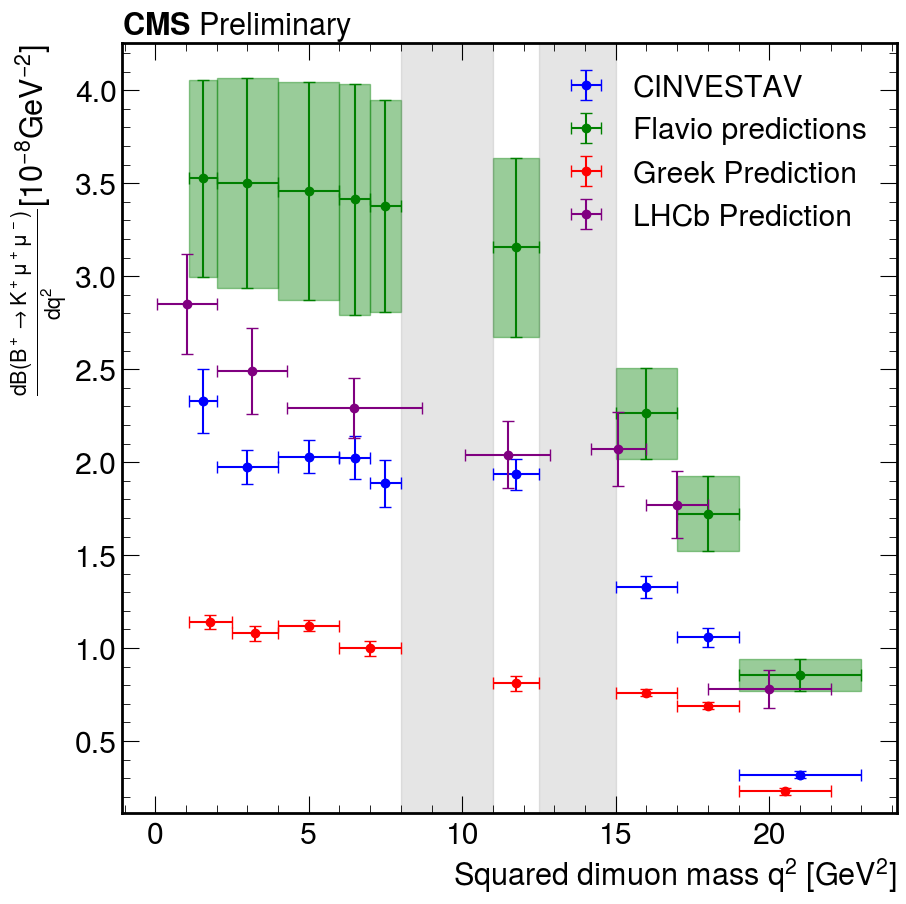

In [31]:
plt.scatter(mids, rescaled_BRs)
#plt.errorbar(17.5, 5.17, xerr=2.5, color='cyan') SM Lattice
plt.errorbar(mids, rescaled_BRs, xerr=xbars, yerr=rescaled_BRs_u, fmt='bo', capsize=4, label='CINVESTAV')
plt.errorbar(mids, Flavio_prediction, xerr=xbars, yerr=Flavio_uncertainty, fmt='o', color='green', capsize=4, 
             label = 'Flavio predictions')
#plt.errorbar(mids2, greeks_prediction, xerr=xbars2, yerr=greeks_uncertainty, fmt='o', color='red', capsize=4,
#             label = 'Greek Prediction')
plt.errorbar(mids3, lhcb_prediction, xerr=xbars3, yerr=lhcb_uncertainty, fmt='o', color='purple', capsize=4,
             label = 'LHCb Measurement')
#plt.legend()

#Box uncertainties
plot_all_box(mids, Flavio_prediction, xerrs=xbars, yerrs=Flavio_uncertainty, color='green', alpha=0.4)
#plt.errorbar(mids, Flavio_prediction, xerr=xbars, yerr=Flavio_uncertainty, 
#             color='green', marker='o', capsize=2, ls='none')

#Mass vetos 
y_max = np.max([np.array(Flavio_prediction)+np.array(Flavio_uncertainty), np.array(rescaled_BRs)+np.array(rescaled_BRs_u)]) 
y_min = np.min([np.array(Flavio_prediction)-np.array(Flavio_uncertainty), np.array(rescaled_BRs)-np.array(rescaled_BRs_u)])
distance = y_max - y_min
y_max+= distance*0.05
y_min-= 0.05*distance
plt.ylim(y_min, y_max)
plt.fill_betweenx([y_min, y_max], 
            [q2_bins[4][1], q2_bins[4][1]], 
            [q2_bins[5][0], q2_bins[5][0]], color='grey', alpha=0.2)

plt.fill_betweenx([y_min, y_max], 
            [q2_bins[5][1], q2_bins[5][1]], 
            [q2_bins[6][0], q2_bins[6][0]], color='grey', alpha=0.2)

#Back to the plot
plt.title('$\\bf{CMS}$ Preliminary', loc='left', fontsize=22)
plt.xlabel('Squared dimuon mass $q^2$ [GeV$^2$]', fontsize=22)
plt.legend(loc='upper right', fontsize = 'small')
plt.ylabel('$\\frac{ d\\mathrm{B}(B^+ \\rightarrow K^+\\mu^+\\mu^-)}{dq^2} [10^{-8} GeV^{-2}]$', fontsize=22)
plt.savefig(os.path.join(output_dir, 'BR_comparisons_complete.pdf'), bbox_inches='tight')
plt.savefig(os.path.join(output_dir, 'BR_comparisons_complete.png'), bbox_inches='tight')
plt.show()

In [32]:
for_blinded = [0.5442292252959519, 0.36995516654807925, 0.6039200385961945, 0.625720304108054, 0.06552885923981311, 0.013167991554874137, 0.83746908209646, 0.25935401432800764, 0.23433096104669637]
               
np_rescaledBRs = np.array(rescaled_BRs)
np_forblinded = np.array(for_blinded)
np_rescaled_err = np.array(rescaled_BRs_u)

blinded = np_forblinded * np_rescaledBRs
blinded_u = np_rescaled_err * np_forblinded

blinded = list(blinded)
blinded_u = list(blinded_u)

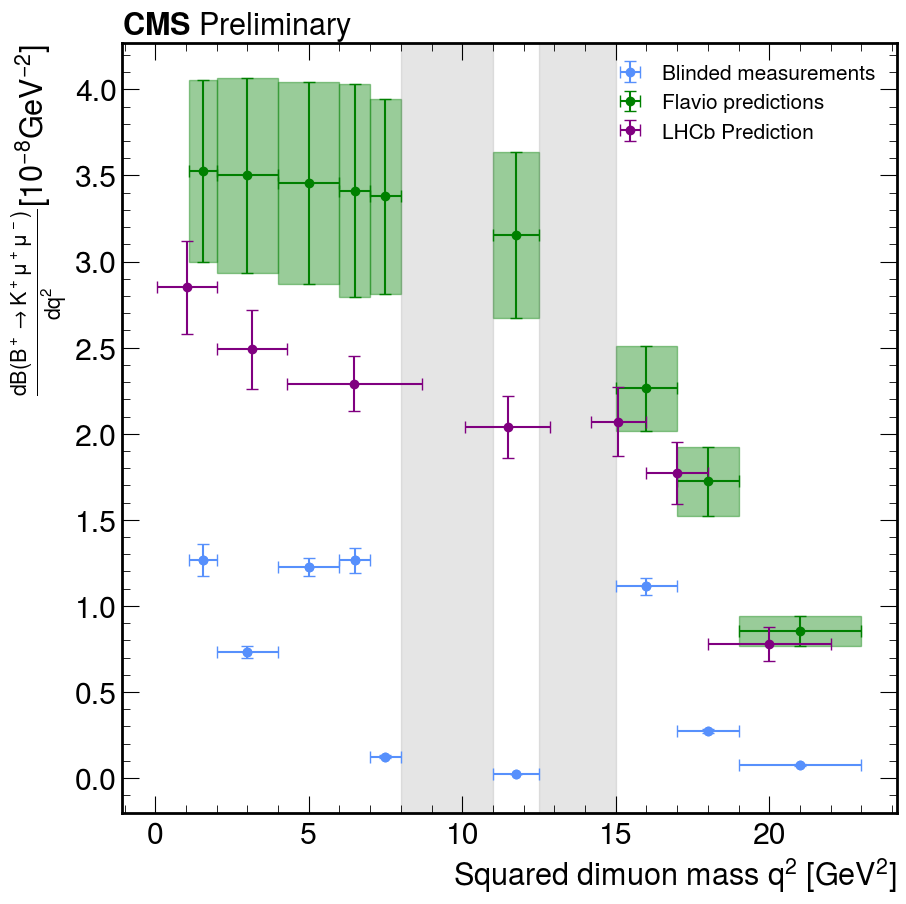

In [33]:
plt.scatter(mids, blinded)
#plt.errorbar(17.5, 5.17, xerr=2.5, color='cyan') SM Lattice
plt.errorbar(mids, blinded, xerr=xbars, yerr=blinded_u, fmt='o', capsize=4, label='Blinded measurements')
plt.errorbar(mids, Flavio_prediction, xerr=xbars, yerr=Flavio_uncertainty, fmt='o', color='green', capsize=4, 
             label = 'Flavio predictions')
plt.errorbar(mids3, lhcb_prediction, xerr=xbars3, yerr=lhcb_uncertainty, fmt='o', color='purple', capsize=4,
             label = 'LHCb Measurement')
#plt.legend()

#Box uncertainties
plot_all_box(mids, Flavio_prediction, xerrs=xbars, yerrs=Flavio_uncertainty, color='green', alpha=0.4)
#plt.errorbar(mids, Flavio_prediction, xerr=xbars, yerr=Flavio_uncertainty, 
#             color='green', marker='o', capsize=2, ls='none')

#Mass vetos 
y_max = np.max([np.array(Flavio_prediction)+np.array(Flavio_uncertainty), np.array(rescaled_BRs)+np.array(rescaled_BRs_u)]) 
y_min = 0
distance = y_max - y_min
y_max+= distance*0.05
y_min-= 0.05*distance
plt.ylim(y_min, y_max)
plt.fill_betweenx([y_min, y_max], 
            [q2_bins[4][1], q2_bins[4][1]], 
            [q2_bins[5][0], q2_bins[5][0]], color='grey', alpha=0.2)

plt.fill_betweenx([y_min, y_max], 
            [q2_bins[5][1], q2_bins[5][1]], 
            [q2_bins[6][0], q2_bins[6][0]], color='grey', alpha=0.2)

#Back to the plot
plt.title('$\\bf{CMS}$ Preliminary', loc='left', fontsize=22)
plt.xlabel('Squared dimuon mass $q^2$ [GeV$^2$]', fontsize=22)
plt.legend(loc='upper right', fontsize = 15)
plt.ylabel('$\\frac{ d\\mathrm{B}(B^+ \\rightarrow K^+\\mu^+\\mu^-)}{dq^2} [10^{-8} GeV^{-2}]$', fontsize=22)

plt.savefig(os.path.join(output_dir, 'BR_comparisons_complete.pdf'), bbox_inches='tight')
plt.savefig(os.path.join(output_dir, 'BR_comparisons_complete.png'), bbox_inches='tight')
plt.show()